In [8]:
import keras
keras.__version__

'2.2.4'

In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Let's display the architecture of our convnet so far:

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                36928     
__________

In [11]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 20s 328us/step - loss: 0.1694 - acc: 0.9473
Epoch 2/5
60000/60000 [==============================] - 19s 323us/step - loss: 0.0476 - acc: 0.9857
Epoch 3/5
60000/60000 [==============================] - 19s 321us/step - loss: 0.0328 - acc: 0.9896
Epoch 4/5
60000/60000 [==============================] - 19s 322us/step - loss: 0.0240 - acc: 0.9926
Epoch 5/5
60000/60000 [==============================] - 19s 316us/step - loss: 0.0191 - acc: 0.9940


In [13]:
model.save('mnist-conv.h5')

Let's evaluate the model on the test data:

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 96us/step


0.9903

In [15]:
# Predicting
from tensorflow.keras.models import load_model
import numpy as np

classifier = load_model('mnist-conv.h5')

sample = test_images[22].reshape(1, 28, 28, 1)

prediction = classifier.predict(sample, batch_size=None,steps=1)

print(np.argmax(prediction))
print()

6



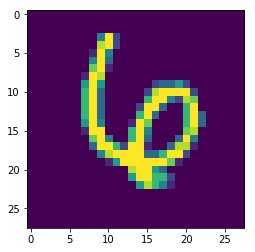

In [16]:
import matplotlib.pyplot as plt

plt.imshow(test_images[22].reshape(28,28))
plt.show()

While our densely-connected network from Chapter 2 had a test accuracy of 97.8%, our basic convnet has a test accuracy of 99.3%: we 
decreased our error rate by 68% (relative). Not bad! 